# Monte Carlo Method

## Ramdom Dequences

We define a sequence r1,r2,… as random if there are no correlations among the numbers. Yet being random does not mean that all the numbers in the sequence are equally likely to occur. If all the numbers in a sequence are equally likely to occur, then the sequence is called uniform, which doesn't say anything about being random. To illustrate, 1, 2, 3, 4, … is uniform but probably not random. Further, it is possible to have a sequence of numbers that, in some sense, are random but have very short-range correlations among themselves, for example,

r1,(1−r1),r2,(1−r2),r3,(1−r3),…

have short-range but not long-range correlations.

Mathematically, the likelihood of a number occurring is described by a distribution function P(r), where P(r)dr is the probability of finding r in the interval [r,r+dr]. A uniform distribution means that P(r)= a constant. The standard random-number generator on computers generates uniform distributions between 0 and 1. 

By their very nature, computers are deterministic devices and so cannot create a random sequence. Computed random number sequences must contain correlations 
and in this way cannot be truly random. For this reason, computers are said to generate pseudorandom numbers 

# 1. Random-Number Generator
The linear congruent or power residue method is the common way of generating a pseudorandom sequence of numbers between 0 and M-1. To obtain the next random number ri+1, you multiply the present random number ri by the constant a, add another constant c, take the modulus by M, and then keep just the fractional part 
\begin{equation}
r_{i+1}=(ar_{i}+c)mod M
\end{equation}

In python, the modulus operator is %

256
512
768


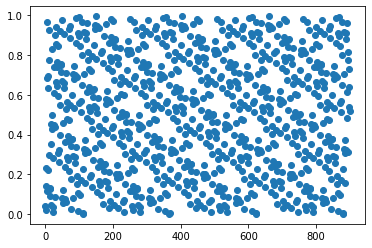

In [20]:
import numpy as np
import matplotlib.pyplot as plt

a=57
c=1
M=256

nr=900
ri=np.zeros(nr)
ri[0]=10
for i in range(1,nr):
    ri[i]= (a*ri[i-1]+c)%M
    # please finish this line for your own random number generator
    # please finish this line to see if ri[i] equals ri[0], if equal, print i to determine the period
    if ri[i] == ri[0]:
        print(i)
plt.plot(range(nr),ri/M,'o')
plt.show()

1. Write a simple program to generate random numbers using the linear congruent method.

2. For pedagogical purposes, try the unwise choice: (a,c,M,r1)=(57,1,256,10). Determine the period, that is, how many numbers are generated before the sequence repeats.

3. Take the pedagogical sequence of random numbers and look for correlations by observing clustering on a plot of successive pairs (xi,yi)=$(r_{2i−1},r_{2i})$, i=1,2,…. (Do not connect the points with lines.) You may "see" correlations , which means that you should not use this sequence for serious work.

4. Test the built-in random-number generator on your computer for correlations by plotting the same pairs as above. (This should be good for serious work.)

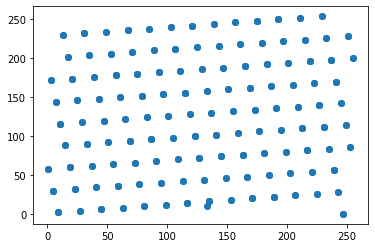

In [22]:
# please make the plot showing (r_{2i-1},r_{2i}) as dots
xp = []
yp = []

for i in range(299):
    xp.append(ri[2*i-1])
    yp.append(ri[2*i])
plt.plot(xp,yp,'o')
plt.show()

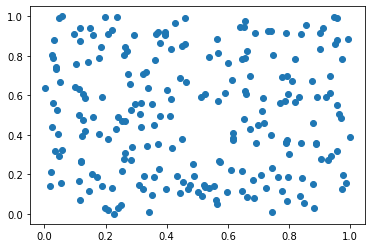

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random

nr=600
ri=np.zeros(nr)
ri[0]=10
for i in range(1,nr):
    ri[i]=random.random()

plt.plot(ri[2*np.arange(1,229)-1],ri[2*np.arange(1,229)],'o')
plt.show()

## 1.1 other tests 
1.2.1 A simple test for uniformity is the kth moment of distribution
\begin{equation}
<x^k>=\frac{1}{N}\sum x_i^k\sim\int_{0}^1 dx x^k P(x)\sim\frac{1}{k+1}+O(\frac{1}{\sqrt{N}})
\end{equation}

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random

nr=1000
ri=np.zeros(nr)
for i in range(0,nr):
    ri[i]=random.random()

k=1
#please test <x^k> is close to 1/k+1 
s = np.sum(ri)/len(ri)
kap = 1/(k+1)
print('avg of random numbers is ',s)
print('1/k+1 is ',kap)

avg of random numbers is  0.5109436976261339
1/k+1 is  0.5


1.2.2 A test that determines the near-neighbor correlation in your random sequence by taking sums of products for small k
\begin{equation}
\frac{1}{N}\sum x_{i}x_{i+k} (k=1,2,...)\sim\int_{0}^1 dx\int_{0}^1 dy xy P(x,y)=\frac{1}{4}
\end{equation}

In [20]:
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt
import random

nr=600
ri=np.zeros(nr)
for i in range(0,nr):
    ri[i]=random.random()

k=4
# please test the above near-neighbor correlation 

0.22779448869914118

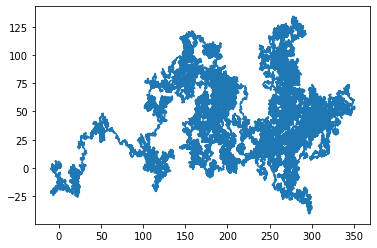

/Users/zhzhu/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/zhzhu/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


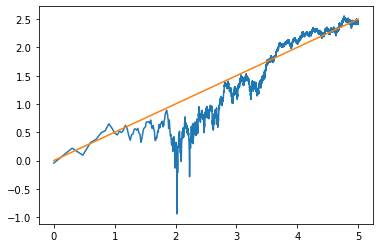

In [21]:
# random walk for jmax steps

from numpy import *
import matplotlib.pyplot as plt
jmax=100000
xarr=np.zeros(jmax)
yarr=np.zeros(jmax)
rarr=np.zeros(jmax)
x=0.
y=0.
dr=0.0
for i in range(0,jmax):
    x += 2.0*random.random()-1.0
    y += 2.0*random.random()-1.0
    xarr[i] = x
    yarr[i] = y
    R=sqrt(x*x+y*y)
    rarr[i] = R
    
plt.plot(xarr,yarr)
plt.show()
# please plot how log10(R) changes with log10(step), and compare it with log10(step) vs. log10(sqrt(step))


plt.show()

# 2 Application
## 2.1 Calculate the area

Write a program to calculate $\pi$

In [31]:
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt
import random

nr=60000
count=0
for i in range(0,nr):
    x=random.random()*2.-1.
    y=random.random()*2.-1.
    # please finish this program to calculate the total count within the circle
        
print(count/nr*4.)


3.140066666666667


## 2.2 Sampling from a continous distribution

### 2.2.1 Direct Solution
If f(x) and F(x) represent probability density function (PDF) and cumulative distributuion function (CDF) of a random variable x,
and $\xi$ is a raondom number distributed uniformly from 0 to 1.
If x is such that 
\begin{equation}
F(x)=\xi
\end{equation}
Then for $\xi$ there is a corresponding x, and the x is distributed accroding 
to the probability density function f(x).

## Rayleigh distribution 
Rayleigh distribution appears quite frequently.

It is given by f(x)=0 if x$<$0 and 
\begin{equation}
f(x)=x*exp(-x^2/2) \;\;if\; x>0
\end{equation}

The accumulative distribution is
\begin{equation}
F(x)=1-exp(-x^2/2)
\end{equation}


 please generate random numbers following rayleign distribution.
 
 Please verify that it follows the rayleigh distribution

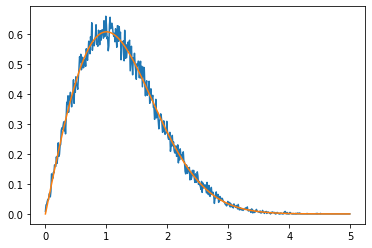

In [40]:
# Rayleigh distribution appears quite frequently
# it is given by f(x)=0 if x<0 and f(x)=x*exp(-x^2/2) if x>0
# please generate random numbers following rayleign distribution
# Please verify that it follows the rayleigh distribution
import numpy as np
import matplotlib.pyplot as plt
import random

nr=60000
count=0
xar=np.arange(0.,5.,0.01)
yar=np.zeros(np.size(xar))
for i in range(0,nr):
    y=random.random()
    x= # please finish this line to generate x which has a Rayleigh distribution
    if (x<5.):
        yar[int(x*100)]+=1
        
plt.plot(xar,yar/(nr*0.01))
plt.plot(xar,xar*exp(-xar*xar/2))
plt.show()

### 2.2.2 Rejection Sampling
Suppose we want to sample from the density p(x). 
If we can sample uniformly from the 2-D region under the curve,
then this process is the same as sampling from p(x). In rejection sampling,
another density q(x) is considered from which we can sample directly under the restriction that p(x)$<$M q(x) where M$>$1 is an appropriate bound on p(x)/q(x). The rejection
sampling algorithm is described below

i=0

while i not equal N do

    x_i=q(x)
    u=U(0,1)  
    if u<p(x_i)/Mq(x_i) then    
        accept x_i        
        i++        
    else
        reject x_i    
    end if   
end while

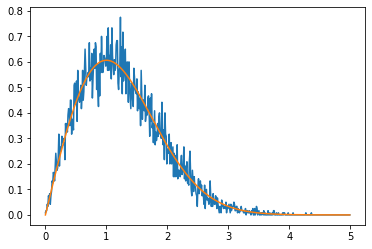

In [42]:
# Use rejection sampling to generate Rayleigh distribution. choose q(x) as a uniform distribution from 0 to 5. 
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt
import random

nr=60000
nrt=0
count=0
xar=np.arange(0.,5.,0.01)
yar=np.zeros(np.size(xar))
for i in range(0,nr):
    x=5.*random.random()
    y=random.random()
    if (y<x*exp(-x*x/2.)):
        yar[int(x*100)]+=1
        nrt+=1
        
plt.plot(xar,yar/(nrt*0.01))
plt.plot(xar,xar*exp(-xar*xar/2))
plt.show()